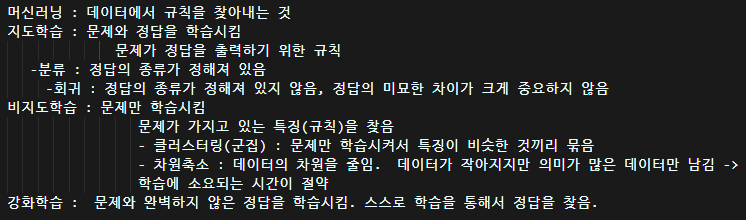

### AND 연산 
- 문제정의  
  훈련 데이터와 테스트 데이터 이해하기  
  AND 연산의 결과를 도출하는 머신러닝모델 학습하고 이해하기

In [2]:
# 필요한 도구 불러오기
import pandas as pd

In [3]:
#DataFrame 만들기 (데이터 생성)
# 행 : 8, 열(컬럼) : 3
df = pd.DataFrame({'A':[0,0,1,1,1,0,1,0],
             'B':[0,1,0,1,0,0,1,1],
             'AandB':[0,0,0,1,0,0,1,0]})
df

,A,B,AandB
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,1,0,0
5,0,0,0
6,1,1,1
7,0,1,0


- 'A', 'B' : 문제데이터, 특성, feature, 독립변수, X, 속성
- 'AandB' : 정답데이터, target, label, 클래스, 종속변수, y

### 데이터 전처리
- 컬럼인덱싱을 통해서 문제데이터(X)와 정답데이터(y)로 분리하기

In [4]:
X = df[['A','B']]
y = df[['AandB']]

### 학습을 위해 훈련용 데이터와 테스트용 데이터로 분할
- 학습(훈련), 검증(테스트)

In [5]:
# 훈련용 데이터 : X, y ==> 0 ~ 5까지 포함해서 행 슬라이싱
# 테스트용 데이터 : X, y ==> 6 ~ 7까지 포함해서 행 슬라이싱
X_train = X.iloc[:6]
X_test = X.iloc[6:]
y_train = y.iloc[:6]
y_test = y.iloc[6:]

In [6]:
print('훈련용 문제 : ', X_train.shape)
print('훈련용 답 : ', y_train.shape)
print('테스트용 문제 : ', X_test.shape)
print('테스트용 답 : ', y_test.shape)

훈련용 문제 :  (6, 2)
훈련용 답 :  (6, 1)
테스트용 문제 :  (2, 2)
테스트용 답 :  (2, 1)


### 머신러닝 모델 학습하기

#### 학습하기 위한 머신러닝 모델 불러오기

In [7]:
# sckit-learn : 머신러닝용 패키지 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier    # KN 분류 모델

#### 모델 생성 및 하이퍼 파라미터 정의(튜닝)

In [8]:
knn_model = KNeighborsClassifier(n_neighbors=1)
# n_neighbors : 하이퍼 파라미터 - 사용자가 입력하는 매개변수
# 하이퍼 퍼라미터에 따라 모델 학습이 달라짐
# 가장 가까운 이웃들의 실제 답을 확인하고 그 답이 내것인 것처럼 사용
# n_neighbors=1 : 가장 가까운 이웃 1개의 실제답을 확인하겠음

#### 모델 학습

In [9]:
# fit() 사용
# fit(훈련용 문제, 훈련용 답)
knn_model.fit(X_train, y_train) # 훈련용 데이터에 맞춰서 학습 - 지도학습(문제, 답)

c:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

#### AND 연산 예측

In [10]:
X_test

,A,B
6,1,1
7,0,1


In [13]:
# and 연산 예측
# 0, 0 -> 0
# 0, 1 -> 0
# 1, 0 -> 0
# 1, 1 -> 1
# predict(테스트용 문제)
pre = knn_model.predict(X_test)
pre # 결과를 활용하기 위해 변수에 담기. 정확한 정답은 아니고 틀릴 수도 있다.

c:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0], dtype=int64)

In [12]:
y_test

,AandB
6,1
7,0


###  평가

#### 모델 평가하는 모듈 불러오기

In [14]:
from sklearn.metrics import accuracy_score  # 정확도 점수 (모델 성능 평가 지표)

In [15]:
# 정확도란
# 0 -> 0 정답
# 1 -> 1 정답
# 1 -> 0 오류

# accuracy_score : 모델이 가지고 있는 함수가 아니고 그냥 함수 자체적으로 역할
# accuracy_score(실제 답, 예측값)
accuracy_score(y_test, pre) # 확률정보로 값을 표시 1.0 -> 100% 맞췄다라는 의미

# 0.0에 가까울수록 모델 성능이 좋지 못하다
# 1.0에 가까울수록 모델 성능이 나름대로 괜찮다

1.0